<a href="https://colab.research.google.com/github/ZUZAA01024730/Example/blob/main/Cerveza_de_VAR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

# Read the Data

In [35]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [41]:
cerveza_vs_temperatura = pd.read_csv('https://raw.githubusercontent.com/ZUZAA01024730/Example/main/cerveza_vs_temperatura.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [42]:
cerveza_vs_temperatura

,cerveza,temperatura
Month,,
2004-01-01,34,15
2004-02-01,44,0
2004-03-01,54,0
2004-04-01,50,0
2004-05-01,61,0
...,...,...
2019-09-01,87,13
2019-10-01,82,29
2019-11-01,82,52


In [40]:
cerveza = cerveza.asfreq(pd.infer_freq(cerveza.index))

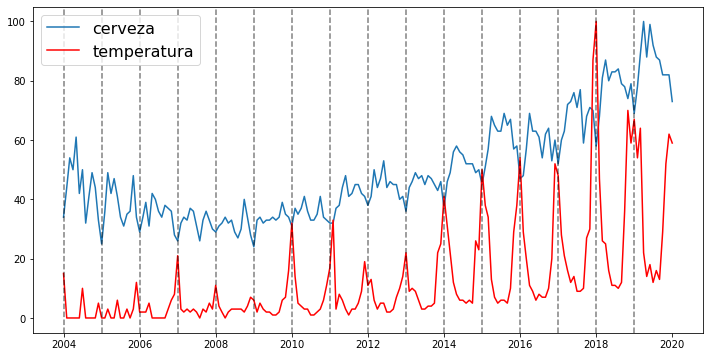

In [43]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])
temperatura, = plt.plot(cerveza_vs_temperatura['temperatura'], color='red')

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['cerveza', 'temperatura'], fontsize=16)

# Normalize

In [44]:
avgs = cerveza_vs_temperatura.mean()
devs = cerveza_vs_temperatura.std()

In [45]:
for col in cerveza_vs_temperatura.columns:
    cerveza_vs_temperatura[col] = (cerveza_vs_temperatura[col] - avgs.loc[col]) / devs.loc[col]

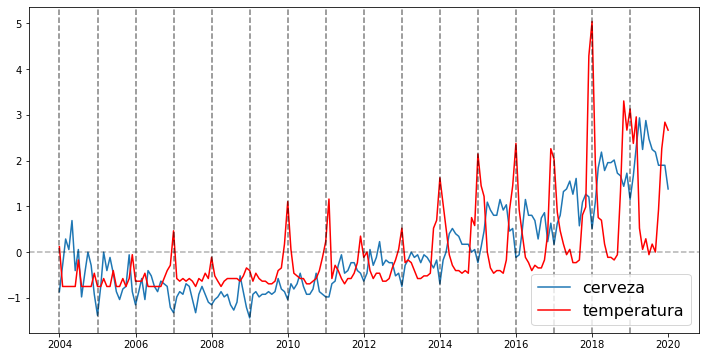

In [46]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])
temperatura, = plt.plot(cerveza_vs_temperatura['temperatura'], color='red')

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['cerveza', 'temperatura'], fontsize=16)

# Take First Difference to Remove Trend

In [47]:
cerveza_vs_temperatura = cerveza_vs_temperatura.diff().dropna()

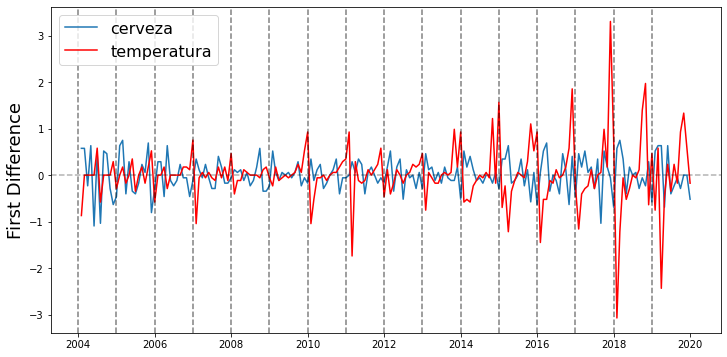

In [48]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])
temperatura, = plt.plot(cerveza_vs_temperatura['temperatura'], color='red')

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['cerveza', 'temperatura'], fontsize=16)

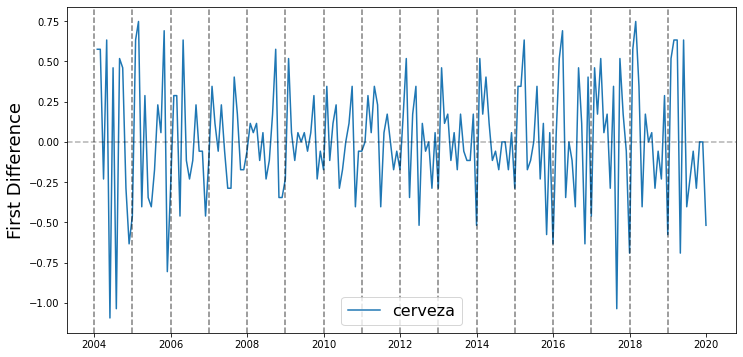

In [49]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['cerveza'], fontsize=16)

# Remove Increasing Volatility

In [50]:
annual_volatility = cerveza_vs_temperatura.groupby(cerveza_vs_temperatura.index.year).std()

In [51]:
annual_volatility

,cerveza,temperatura
Month,,
2004,0.675684,0.384863
2005,0.514717,0.258568
2006,0.330786,0.217337
2007,0.237842,0.399623
2008,0.254968,0.205788
2009,0.209064,0.194797
2010,0.241146,0.462666
2011,0.207375,0.642732
2012,0.296678,0.233755


In [52]:
cerveza_vs_temperatura['cerveza_annual_vol'] = cerveza_vs_temperatura.index.map(lambda d: annual_volatility.loc[d.year, 'cerveza'])
cerveza_vs_temperatura['temperatura_annual_vol'] = cerveza_vs_temperatura.index.map(lambda d: annual_volatility.loc[d.year, 'temperatura'])

In [53]:
cerveza_vs_temperatura

,cerveza,temperatura,cerveza_annual_vol,temperatura_annual_vol
Month,,,,
2004-02-01,0.575825,-0.869405,0.675684,0.384863
2004-03-01,0.575825,0.000000,0.675684,0.384863
2004-04-01,-0.230330,0.000000,0.675684,0.384863
2004-05-01,0.633408,0.000000,0.675684,0.384863
2004-06-01,-1.094068,0.000000,0.675684,0.384863
...,...,...,...,...
2019-09-01,-0.057583,-0.173881,0.484344,0.976492
2019-10-01,-0.287913,0.927366,0.484344,0.976492
2019-11-01,0.000000,1.333088,0.484344,0.976492


In [54]:
cerveza_vs_temperatura['cerveza'] = cerveza_vs_temperatura['cerveza'] / cerveza_vs_temperatura['cerveza_annual_vol']
cerveza_vs_temperatura['temperatura'] = cerveza_vs_temperatura['temperatura'] / cerveza_vs_temperatura['temperatura_annual_vol']

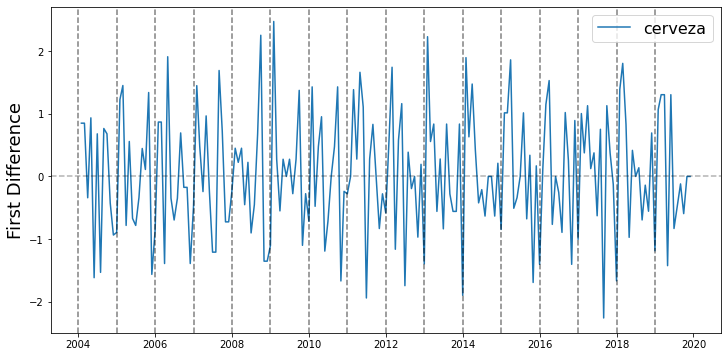

In [55]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['cerveza'], fontsize=16)

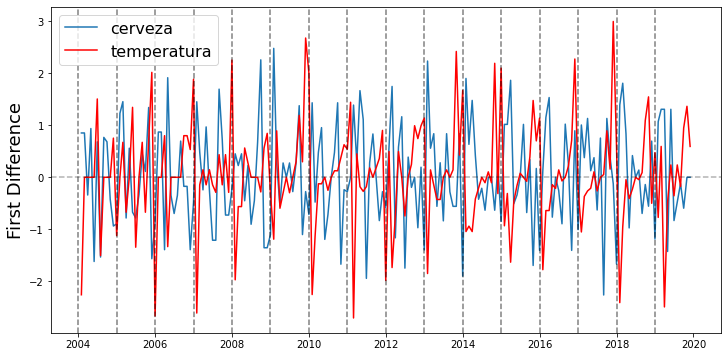

In [56]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])
temperatura, = plt.plot(cerveza_vs_temperatura['temperatura'], color='red')

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['cerveza', 'temperatura'], fontsize=16)

# Remove Seasonality

In [57]:
month_avgs = cerveza_vs_temperatura.groupby(cerveza_vs_temperatura.index.month).mean()

In [58]:
print(month_avgs)

        cerveza  temperatura  cerveza_annual_vol  temperatura_annual_vol
Month                                                                   
1     -0.971250     0.501064            0.327850                0.566164
2      1.131214    -1.136543            0.349589                0.554833
3      0.854586    -0.449301            0.349589                0.554833
4      0.357618    -0.472720            0.349589                0.554833
5      0.232542    -0.223121            0.349589                0.554833
6      0.002925     0.038238            0.349589                0.554833
7     -0.613054    -0.115961            0.349589                0.554833
8     -0.171502    -0.091055            0.349589                0.554833
9      0.166356     0.110653            0.349589                0.554833
10     0.428012     0.360196            0.349589                0.554833
11    -0.649279     0.882341            0.349589                0.554833
12    -0.243259     0.952121            0.349589   

In [60]:
cerveza_vs_temperatura['cerveza_month_avg'] = cerveza_vs_temperatura.index.map(lambda d: month_avgs.loc[d.month, 'cerveza'])
cerveza_vs_temperatura['temperatura_month_avg'] = cerveza_vs_temperatura.index.map(lambda d: month_avgs.loc[d.month, 'temperatura'])

In [61]:
cerveza_vs_temperatura

,cerveza,temperatura,cerveza_annual_vol,temperatura_annual_vol,cerveza_month_avg,temperatura_month_avg
Month,,,,,,
2004-02-01,0.852211,-2.259003,0.675684,0.384863,1.131214,-1.136543
2004-03-01,0.852211,0.000000,0.675684,0.384863,0.854586,-0.449301
2004-04-01,-0.340885,0.000000,0.675684,0.384863,0.357618,-0.472720
2004-05-01,0.937433,0.000000,0.675684,0.384863,0.232542,-0.223121
2004-06-01,-1.619202,0.000000,0.675684,0.384863,0.002925,0.038238
...,...,...,...,...,...,...
2019-09-01,-0.118888,-0.178067,0.484344,0.976492,0.166356,0.110653
2019-10-01,-0.594438,0.949691,0.484344,0.976492,0.428012,0.360196
2019-11-01,0.000000,1.365181,0.484344,0.976492,-0.649279,0.882341


In [62]:
cerveza_vs_temperatura['cerveza'] = cerveza_vs_temperatura['cerveza'] - cerveza_vs_temperatura['cerveza_month_avg']
cerveza_vs_temperatura['temperatura'] = cerveza_vs_temperatura['temperatura'] - cerveza_vs_temperatura['temperatura_month_avg']

In [63]:
cerveza_vs_temperatura

,cerveza,temperatura,cerveza_annual_vol,temperatura_annual_vol,cerveza_month_avg,temperatura_month_avg
Month,,,,,,
2004-02-01,-0.279003,-1.122459,0.675684,0.384863,1.131214,-1.136543
2004-03-01,-0.002375,0.449301,0.675684,0.384863,0.854586,-0.449301
2004-04-01,-0.698502,0.472720,0.675684,0.384863,0.357618,-0.472720
2004-05-01,0.704890,0.223121,0.675684,0.384863,0.232542,-0.223121
2004-06-01,-1.622127,-0.038238,0.675684,0.384863,0.002925,0.038238
...,...,...,...,...,...,...
2019-09-01,-0.285243,-0.288721,0.484344,0.976492,0.166356,0.110653
2019-10-01,-1.022451,0.589495,0.484344,0.976492,0.428012,0.360196
2019-11-01,0.649279,0.482840,0.484344,0.976492,-0.649279,0.882341


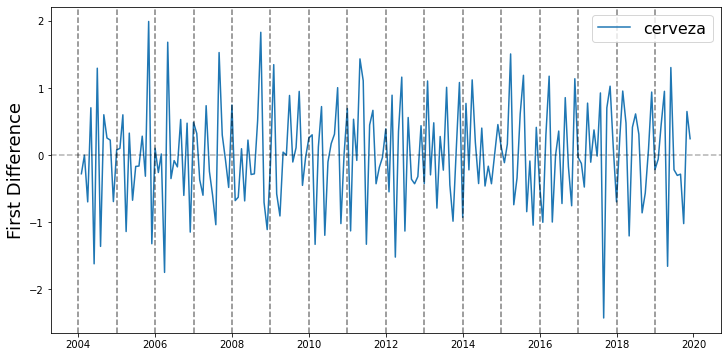

In [65]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['cerveza'], fontsize=16)

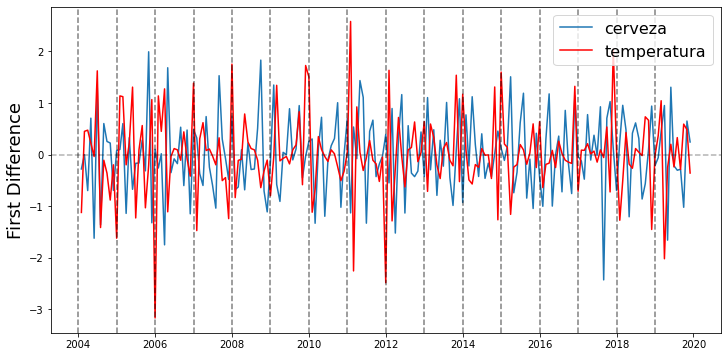

In [66]:
plt.figure(figsize=(12,6))
cerveza, = plt.plot(cerveza_vs_temperatura['cerveza'])
temperatura, = plt.plot(cerveza_vs_temperatura['temperatura'], color='red')

for year in range(2004, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['cerveza', 'temperatura'], fontsize=16)

# PACF - Heater

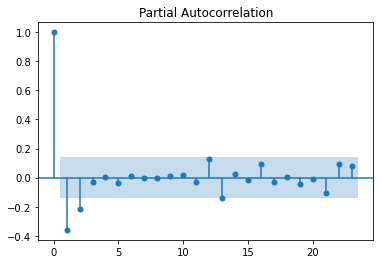

In [27]:
plot_pacf(ice_cream_heater_df['heater'])
plt.show()

## So consider an AR(2)

# Correlation between "heater" and lagged "ice cream"

In [28]:
for lag in range(1, 14):
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['ice cream'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
(-0.03154450742591565, 0.6607284991749967)
------
Lag: 2
(-0.09872703210944633, 0.1697084190508982)
------
Lag: 3
(-0.0017838553789235791, 0.9803056762962026)
------
Lag: 4
(0.06023971859825542, 0.4052979832528944)
------
Lag: 5
(-0.05403486448015028, 0.45664426275062703)
------
Lag: 6
(0.06461183026553835, 0.37453000434455314)
------
Lag: 7
(-0.04949334618415863, 0.49768766857621993)
------
Lag: 8
(0.07890837135977341, 0.2804548970433407)
------
Lag: 9
(-0.05323501699600429, 0.4681034202228288)
------
Lag: 10
(0.029536989060791177, 0.6882054906332707)
------
Lag: 11
(-0.0597953635152257, 0.41752174204858805)
------
Lag: 12
(-0.07513046035981792, 0.30944092525429134)
------
Lag: 13
(0.19808902198429754, 0.007029107082073339)
------


# Fit a VAR Model

In [29]:
ice_cream_heater_df = ice_cream_heater_df[['ice cream', 'heater']]

In [30]:
model = VAR(ice_cream_heater_df)

In [31]:
model_fit = model.fit(maxlags=13)

In [32]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Feb, 2023
Time:                     23:56:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.016054         0.034105           -0.471           0.638
L1.ice cream         -0.287811         0.079633           -3.614           0.000
L1.heater            -0.121251         0.073673         

# So our final model is:

$$
\hat{h}_t = - 0.41h_{t-1} - 0.19h_{t-2} + 0.2i_{t-13}
$$